<div style="border-radius: 10px; box-shadow: 0px 0px 2px; border: 1px solid; background:#eaeaea; position: relative; padding: 10px; padding-left: 10px;">
<h7 style="color:black; margin-bottom:20px"> 

# <span style="color:#143a51">Исследование рынка компьютерных игр <span> 
    
---
---   
    
**Цель:** на основе данных из открытых источников за 1980 г. - 2016 г. о продажах игр, оценках пользователей и экспертов, жанрах и платформах, необходимо исследовать рынок видеоигр, найти интересные особенности и выявить определяющие успешность игры закономерности, которые помогут для планирования прогнозов и рекламных кампаний в 2017 г.
    
---  
**Описание данных**

`Name` — название игры  
`Platform` — платформа  
`Year_of_Release` — год выпуска  
`Genre` — жанр игры   
`NA_sales` — продажи в Северной Америке (миллионы проданных копий)  
`EU_sales` — продажи в Европе (миллионы проданных копий)  
`JP_sales` — продажи в Японии (миллионы проданных копий)  
`Other_sales` — продажи в других странах (миллионы проданных копий)  
`Critic_Score` — оценка критиков (максимум 100)  
`User_Score` — оценка пользователей (максимум 10)  
`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.     
Данные за 2016 год могут быть неполными.


##  Открытие данных
<a id="start"></a>

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# устанавливаем параметры отображение 
pd.options.display.max_columns = 40 

In [2]:
# считываем данные и сохраним в переменную df
df = pd.read_csv('/datasets/games.csv')

In [3]:
#  создадим функцию start, которая будет выводить основную информацию по датафрейму
def start(df):
    display(df.head())
    print(df.info())
    print()
    print('Размер таблицы:', df.shape)
    print()
    print('Доля пропусков, %:', round(df.isna().mean()*100,2), sep='\n')
    print()
    print('Наличие дубликатов:', df.duplicated().sum())

In [4]:
# вызовем функцию start, в качестве аргумента 
start(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

Размер таблицы: (16715, 11)

Доля пропусков, %:
Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales 

In [5]:
# создадим переменную size_at_start с изначальным размером датафрейма
size_at_start = df.shape[0]
size_at_start

16715

**Вывод:** в датафрейме  `16715` строк и `11` столбцов.  
В столбцах name, genre, year_of_release, critic_score, user_score, rating есть пропуски.   
Явных дубликатов не выявлено.  
Нужно заменить тип данных в year_of_release на int, user_score на float.  
Перевести названия столбцов к нижнему регистру.

## Предобработка данных
<a id="preprocessing"></a>

In [6]:
# приведем названия столбцов к нижнему регистру
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
df[df['platform']=='PS3'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9647,Resident Evil,PS3,2006.0,Action,0.00,0.00,0.12,0.00,NaN,NaN,NaN
317,MotorStorm,PS3,2006.0,Racing,1.53,1.60,0.06,0.67,84.0,7.4,T
1418,Ridge Racer 7,PS3,2006.0,Racing,0.24,0.70,0.16,0.26,78.0,7.1,E
14646,Mahjong Kakutou Club: Zenkoku Taisenban,PS3,2006.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
6406,NBA 07,PS3,2006.0,Sports,0.24,0.00,0.01,0.02,63.0,6.3,E
...,...,...,...,...,...,...,...,...,...,...,...
13609,Battle vs. Chess,PS3,NaN,Misc,0.00,0.03,0.00,0.01,NaN,NaN,T
13647,The History Channel: Great Battles - Medieval,PS3,NaN,Strategy,0.00,0.03,0.00,0.01,NaN,NaN,NaN
15022,Umineko no Naku Koro ni San: Shinjitsu to Gens...,PS3,NaN,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN


In [8]:
# посмотрим на данные с пропусками в столбцах name и genre
df[(df['name'].isna()) | (df['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# удалим строки с пропуском в названиях игр из датафрейма, заодно удалятся и пропуски в жанрах
df = df.dropna(subset=['name'])

In [10]:
# посмотрим, если у нас дубликаты по названию, платформе и году выхода
df[df.duplicated(subset= ['name','platform', 'year_of_release'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [11]:
# удалим дубликат
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')

In [12]:
# посмотрим на столбец name, проверим нужны ли преобразования
len(df['name'].unique()) == len(df['name'].str.lower().str.strip().unique())

True

Кол-во строк при преобразовании в нижний регистр и удаления лишних пробелов в начале и в конце строки не изменилось. Стоит оставить данные в изначальном варианте

In [13]:
# посмотрим на кол-во уникальных названий игр в датафрейме
df['name'].nunique()

11559

Уникальных названий игр гораздо меньше, что связано с тем, что одна игра может выходить на разных платформах.

In [14]:
# посмотрим на данные с пропусками в столбце с годом выпуска 
print('Кол-во пропусков в столбце year_of_release:', df['year_of_release'].isna().sum())
df[df['year_of_release'].isna()].sort_values(by='name')

Кол-во пропусков в столбце year_of_release: 269


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11092,Action Man-Operation Extreme,PS,NaN,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
3289,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7332,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,0.10,0.08,0.00,0.03,56.0,8.5,T
15557,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11433,Zero: Tsukihami no Kamen,Wii,NaN,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN
8884,eJay Clubworld,PS2,NaN,Misc,0.07,0.06,0.00,0.02,69.0,8.6,E


In [15]:
# создадим список list_name с названиями игр, в которых есть пропуски в year_of_release
list_name = df[df['year_of_release'].isna()]['name']

# посмотрим, если дубликаты по названиям игр из list_name
df[(df['name'].isin(list_name)) & (df['name'].duplicated(keep=False))].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4800,AKB1/48: Idol to Guam de Koishitara...,PSP,2011.0,Misc,0.00,0.00,0.40,0.00,NaN,NaN,NaN
16293,AKB1/48: Idol to Guam de Koishitara...,X360,NaN,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E
16353,Aquaman: Battle for Atlantis,GC,2003.0,Action,0.01,0.00,0.00,0.00,27.0,3.1,T
...,...,...,...,...,...,...,...,...,...,...,...
2157,Wheel of Fortune,PS2,NaN,Misc,0.47,0.36,0.00,0.12,NaN,tbd,E
15816,Without Warning,XB,NaN,Shooter,0.01,0.00,0.00,0.00,45.0,2,M
14052,Without Warning,PS2,2005.0,Shooter,0.02,0.01,0.00,0.00,45.0,6.5,M
6077,World of Tanks,PC,2011.0,Shooter,0.00,0.23,0.00,0.05,80.0,3.7,T


Можно предположить, что игра для разных платформ выходит в один год. Но проверка выборочных игр в Википедии, хоть и в большинстве случаев подтвердило данное предположение, но все же есть игры, где года для разных платформ разнятся и для таких игр  заменять пропуски годом выпуска этой же игры для другой платформы не стоит.

В названиях некоторых игр есть указания на год, обычно располагается в конце. Посмотрим есть ли такие игры с пропусками в year_of_release

In [16]:
# создадим список таких игр 

s = []
for i in df.query('year_of_release.isna()')['name'].astype('str'):
    if re.search('\d+\d+\d+\d$', i):
        s.append(i)
print(s)
print('Кол-во:', len(s))

['Madden NFL 2004', 'FIFA Soccer 2004', 'wwe Smackdown vs. Raw 2006', 'NASCAR Thunder 2003', 'Madden NFL 2002', 'NFL GameDay 2003', 'NBA Live 2003', 'All-Star Baseball 2005', 'NBA Live 2003', 'All-Star Baseball 2005', 'Tour de France 2011', 'Sega Rally 2006', 'PDC World Championship Darts 2008', 'Football Manager 2007', 'PDC World Championship Darts 2008']
Кол-во: 15


Из Википедии выяснили, что у некоторых игр совпадает дата выхода с указанной в названии, у других дата релиза приходится на конец предыдущего года. Данный способ тоже не подходит для замены. Тогда заменим пропуски "заглушкой" в виде 1.

In [17]:
# оставшиеся пропуски в year_of_release заменим на 1 и приведём тип данных к целым числам
df['year_of_release'] = df['year_of_release'].fillna(1).astype('int')

# проверим кол-во пропусков в данном столбце
df['year_of_release'].isna().sum()

0

In [18]:
# посмотрим на столбец user_score
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.9       2
1         2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Максимальная оценка 9.7, минимальная 0. У нас есть значение 'tbd', что обозначает To Be Determined (будет определено), т.е для таких игр рейтинг еще не определен.

In [19]:
# заменим 'tbd' в user_score на пропуск и заменим тип данных на float
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

# посмотрим на долю пропусков
df['user_score'].isna().mean()

0.5458951651507898

Доля пропусков столбце user_score увеличилась почти на 14%. Сами пропуски оставим без изменений

В столбце critic_score пропуски тоже трогать не будем

In [20]:
# посмотрим на столбец rating
df['rating'].value_counts()

E       3989
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Из Википедии и сайта https://www.esrb.org/ выявили, что можно K-A ("Kids to Adults") и EC («Early childhood») можно объединить с E («Everyone»). 
В группе AO («Adults Only 18+») и RP («Rating Pending») всего по 1 и 3 игры.

In [21]:
# посмотрим на игры с рейтингами AO и RP
df.query('rating == ["RP", "AO"]')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
875,Grand Theft Auto: San Andreas,XB,2005,Action,1.26,0.61,0.0,0.09,93.0,8.6,AO
13672,Clockwork Empires,PC,1,Strategy,0.00,0.04,0.0,0.00,58.0,3.8,RP
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.00,0.03,0.0,0.01,63.0,6.8,RP
16180,WRC: FIA World Rally Championship,PC,1,Racing,0.00,0.01,0.0,0.00,65.0,NaN,RP


У игры Grand Theft Auto: San Andreas интересная история получения рейтинга AO, даже фильм про эту игру сняли «Переломный момент», на данный момент в App Store это игра имеет рейтинг M («Mature»), т.е от 17+.    
 
Сама организация ESRB была основана в 1994 г. в Америке, система оценок является добровольной. Поэтому не для всех игр будет определен рейтинг. Для игр с пропусками в рейтинге, укажем no_rating

In [22]:
# проведём замену 'K-A' и 'EC' на 'E' с помощью replace()
df['rating'] = df['rating'].replace(['K-A','EC'], 'E')

# проведём замену 'AO' на 'M с помощью replace()
df['rating'] = df['rating'].replace('AO', 'M')

# проведём замену 'RP' на 'no_rating' с помощью replace()
df['rating'] = df['rating'].replace('RP', 'no_rating')

# заменим пропуски в столбце rating на 'no_rating'
df['rating'] = df['rating'].fillna('no_rating')

# проверим
df['rating'].value_counts(normalize=True).apply(lambda x: round(x * 100, 2))

no_rating    40.49
E            23.93
T            17.72
M             9.36
E10+          8.50
Name: rating, dtype: float64

In [23]:
# посмотрим на столбец genre
df['genre'].value_counts(normalize=True).apply(lambda x: round(x * 100, 2))

Action          20.16
Sports          14.04
Misc            10.47
Role-Playing     8.96
Shooter          7.92
Adventure        7.80
Racing           7.47
Platform         5.31
Simulation       5.22
Fighting         5.08
Strategy         4.09
Puzzle           3.47
Name: genre, dtype: float64

Ошибок в названиях рейтингов нет. Больше всего игр в жанре Action

In [24]:
# посмотрим на столбец platform
df['platform'].value_counts(normalize=True).apply(lambda x: round(x * 100, 2))

PS2     12.93
DS      12.87
PS3      7.96
Wii      7.90
X360     7.55
PSP      7.23
PS       7.16
PC       5.83
XB       4.93
GBA      4.92
GC       3.33
3DS      3.11
PSV      2.57
PS4      2.35
N64      1.91
XOne     1.48
SNES     1.43
SAT      1.04
WiiU     0.88
2600     0.80
GB       0.59
NES      0.59
DC       0.31
GEN      0.16
NG       0.07
WS       0.04
SCD      0.04
3DO      0.02
TG16     0.01
GG       0.01
PCFX     0.01
Name: platform, dtype: float64

Вроде явных ошибок в названиях платформ нет. Лидируют по кол-ву игр PS2 и DS. Достаточно большое кол-во платформ с долей игр менее 1%

In [25]:
# посмотрим на мин и макс даты для разных платформы
(
    df[df['year_of_release'] != 1]
    .groupby('platform', as_index=False)['year_of_release']
    .agg(['min','max'])
    .sort_values(by=['min'])
    
)

,min,max
platform,,
2600,1980,1989
NES,1983,1994
DS,1985,2013
PC,1985,2016
GB,1988,2001
SNES,1990,1999
GEN,1990,1994
GG,1992,1992
SCD,1993,1994


Вызывает вопрос, что для DS были игры в 1985, так как сама консоль стала выпускаться довольно позже

In [26]:
# посмотрим на данные игры
df.query('platform == "DS" & year_of_release < 2004 & year_of_release != 1')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating


In [27]:
# данная игра для данной DS вышла в 2007 году, сделаем замену
df.loc[df['name'] == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007

In [28]:
# создадим новый столбец 'total_sales с общими данными проданных копий
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

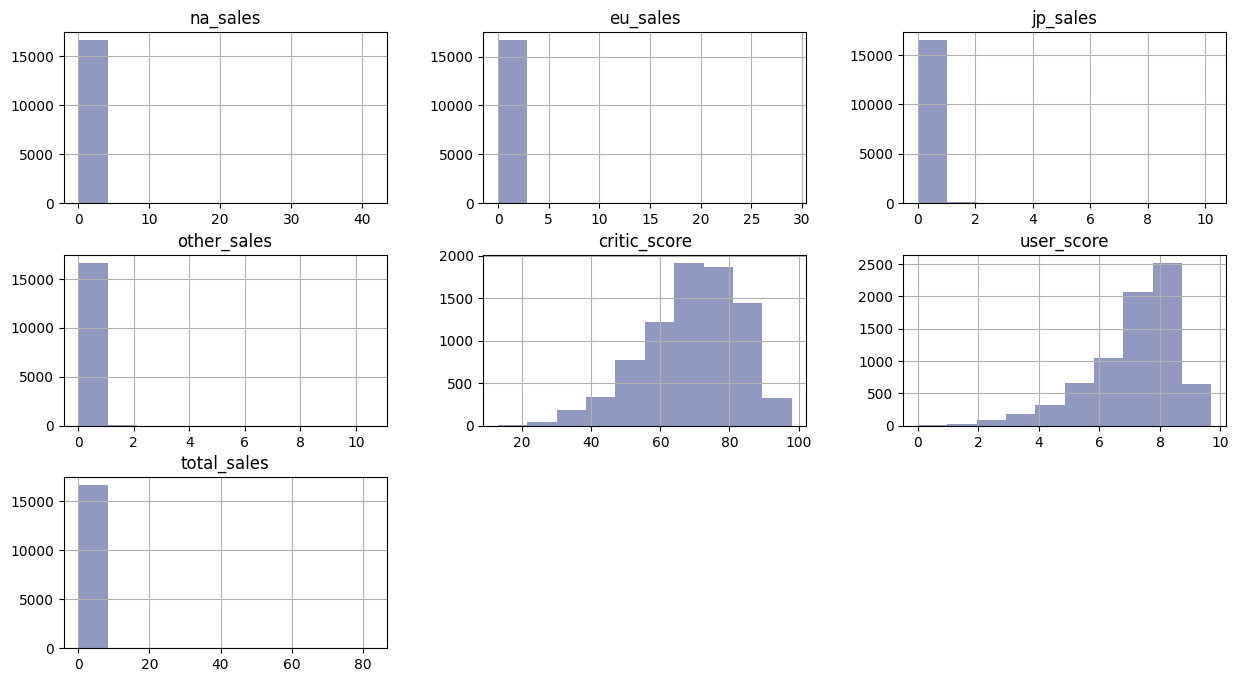

In [29]:
# создадим палитру
palette = ['#9199c0', '#f2bdcd', '#485696', '#f24c00', '#968848', '#f9c784', '#A7754D', '#8a8a8a', '#eddb91', '#484c60', '#964856', '#7ea4b5']
# посмотрим на гистограммы
df.drop(['year_of_release'], axis =1).hist(color=palette[0], figsize=(15,8));

В столбцах с продажами копий видны выбросы в принципе картина свойственна для таких данных. Можно проверить на наличие аномалий.   
В столбцах с оценками значения в пределах допустимых.

In [30]:
# посмотрим на игры, с общей суммой продаж копий равной 0
df.query('total_sales == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.0,0.0,0.0,0.0,NaN,NaN,no_rating,0.0
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.0,0.0,0.0,NaN,NaN,no_rating,0.0


Не понятно почему у данных игр общее кол-во продаж копий равна 0, возможно здесь ошибка. Оставим на данном этапе без изменений.

In [31]:
# посмотрим на игры, с миллионом проданых копий больше 18 
df.query('total_sales >= 18')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating,28.31


Здесь вроде бы все верно, многие игры знакомы, значит они популярны)

In [32]:
# при предобработке данных было удалено
print('Всего удалено строк:', (100 - df.shape[0] / size_at_start * 100))

Всего удалено строк: 0.017947950942271973


**Вывод:**

При предобработке мы:
- привели к ниждему регистру наименования столбцов 
- нашли и удалили неявный дубликат
- в столбцах `name`, `genre`  удалили пропуски
- в столбцах `year_of_release`, `rating` пропуски были заменены
- в столбцах `critic_score`, `user_score` пропуски не трогали.
- в столбце `user_score` значение 'tbd' приравняли к пропуску, связи с эти кол-во пропусков в данном столбце возросло.
- заменили формат данных в столбцах `year_of_release` и `user_score`
- добавили 1 новый столбец `total_sales`.

Всего удалили менее `0.02%` от изначальных данных.


Причин возникновения пропусков может быть много, например, собирались далеко не все данные, имеются ошибки выгрузки. У нас данные за достаточно длительный период и для игр, которые выходили до момента, когда стал массово распространен интернет, логично иметь пропуски в рейтингах пользователей и критиков. Также есть игры, которые из-за своей низкой популярности, могли не оцениваться пользователями и критиками. Что касается рейтингов ESRB, то организация ESRB была основана в 1994 г. в Америке, система оценок является добровольной, поэтому не все производители игр обязаны иметь данный рейтинг, отсюда могут быть и пропуски.
    

## Исследовательский анализ данных
<a id="analysis"></a>



**Анализ игр по годам**
<a id="1"></a>

In [33]:
# посмотрим как менялось кол-во игр по годам, исключим игры,  для которых год выпуска равен 1
df[df['year_of_release'] != 1]['year_of_release'].value_counts().sort_index().to_frame().T

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
year_of_release,9,46,36,17,14,13,21,16,15,17,16,41,43,60,121,219,263,289,379,338,350,482,829,775,762,939,1006,1198,1427,1426,1255,1136,652,544,581,606,502


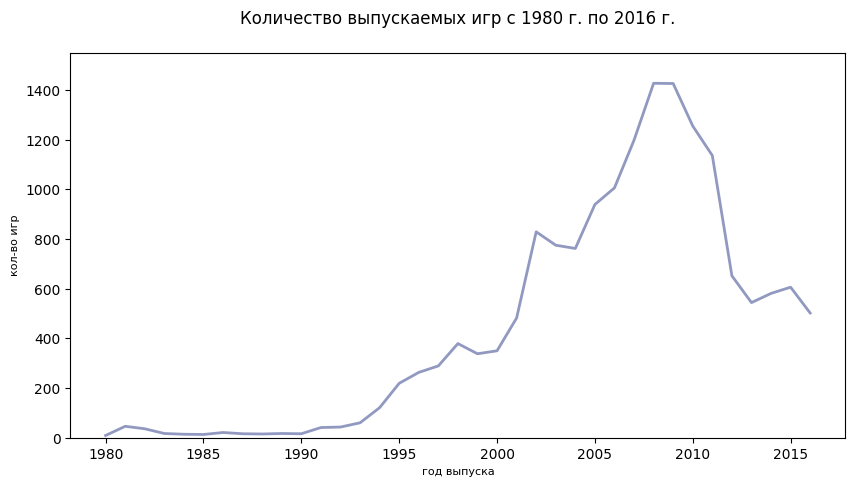

In [34]:
# посмотрим как менялось кол-во игр по годам, исключим игры,  для которых год выпуска равен 1
df[df['year_of_release'] != 1]['year_of_release'].value_counts().sort_index().plot(
                                                                                 color = palette[0],
                                                                                 linewidth= 2.0, 
                                                                                 figsize =(10,5))
plt.xlabel('год выпуска', fontsize='8')
plt.ylabel('кол-во игр', fontsize='8')
plt.ylim(0, 1550)
plt.title('Количество выпускаемых игр c 1980 г. по 2016 г.\n  ', fontsize='12')
plt.show()

In [35]:
# посмотрим на изменение продаж копий по годам
df[df['year_of_release'] != 1].groupby('year_of_release')['total_sales'].agg('sum').sort_index().to_frame().T

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
total_sales,11.38,35.68,28.88,16.8,50.35,53.93,37.08,21.7,47.21,73.45,49.37,32.23,76.16,45.99,79.23,88.12,199.15,201.07,256.31,251.11,201.66,331.46,394.97,357.54,418.68,457.82,517.71,604.77,671.5,658.82,590.13,507.58,355.83,361.24,331.53,267.98,129.94


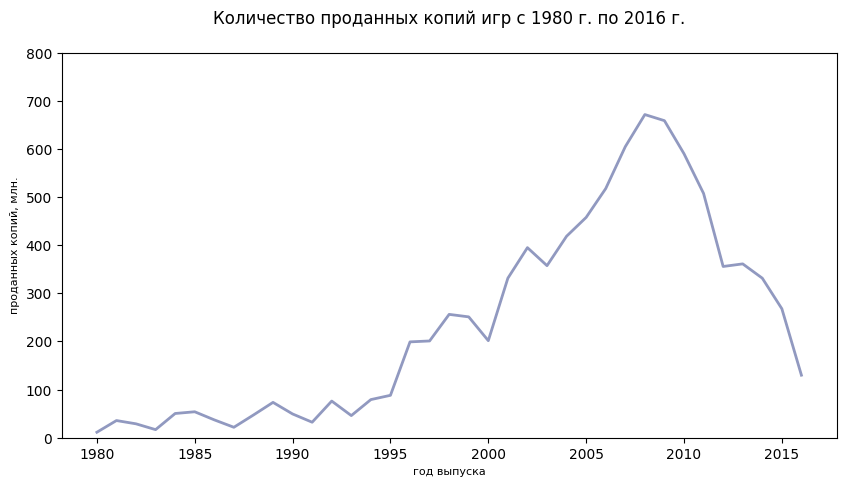

In [36]:
# посмотрим как менялось продажи по годам по годам, исключим игры,  для которых год выпуска равен 1
df[df['year_of_release'] != 1].groupby('year_of_release')['total_sales'].agg('sum').plot(
                                                                                 color = palette[0],
                                                                                 linewidth= 2.0, 
                                                                                 figsize =(10,5))
plt.xlabel('год выпуска', fontsize='8')
plt.ylabel('проданных копий, млн.', fontsize='8')
plt.ylim(0, 800)
plt.title('Количество проданных копий игр c 1980 г. по 2016 г.\n  ', fontsize='12')
plt.show()

Мы видим, что с 1994г начинается рост производства компьютерных игр с пиком в 2008 году (1441 игра). После 2009 года отмечается нисходящий тренд. Видно, что в 2012 г  производство игр по сравнению с 2011г сократилось почти в 2 раза и в промежутке с 2012 по 2016 года колеблется около отметки 600. С продажами картина схожая, единственно видно более выраженное паденийс 2012 года.  
Данный нисходящий тренд после 2008-2009г можно отчасти объяснить мировым кризисом 2008г, но в большей мере падение связано с появлением Iphone и Android и началом роста популярности мобильных игр, а также социальных приложениями.

Стоит отметить, что 2016 году кол-во игр  и проданных копий меньше, чем в 2015 году, но стоит учитывать тот факт, что данные за 2016г могут быть неполными.

**Анализ продаж по платформам**
<a id="2"></a>

In [37]:
# посмотрим как менялись продажи по платформам
df_pl = df.groupby('platform', as_index=False)['total_sales'].sum().sort_values(by='total_sales', ascending=False)
df_pl.T 

,16,28,17,26,4,15,6,18,19,13,2,29,5,11,10,23,7,30,0,27,20,21,8,3,22,12,25,24,1,9,14
platform,PS2,X360,PS3,Wii,DS,PS,GBA,PS4,PSP,PC,3DS,XB,GB,NES,N64,SNES,GC,XOne,2600,WiiU,PSV,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
total_sales,1255.77,971.42,939.64,907.51,806.12,730.86,317.85,314.14,294.05,259.52,259.0,257.74,255.46,251.05,218.68,200.04,198.93,159.32,96.98,82.19,54.07,33.59,28.35,15.95,1.86,1.44,1.42,0.16,0.1,0.04,0.03


In [38]:
# создадим функцию, которая будет выводить линейный график
def plot_n(l, tit):
    (
    df[(df['year_of_release'] != 1) & (df['platform'].isin(l))]
    .pivot_table(index = 'year_of_release', columns ='platform', values = 'total_sales', aggfunc='sum')
    .plot(linewidth= 2.0, color=palette, figsize =(10,5))
)
    plt.legend()
    plt.xlabel('год выпуска', fontsize='8')
    plt.ylabel('сумма продаж копий, млн.', fontsize='8')
    plt.title(tit +' \n Распределение суммы продаж копий игр по годам \n  ', fontsize='12')
    plt.show()

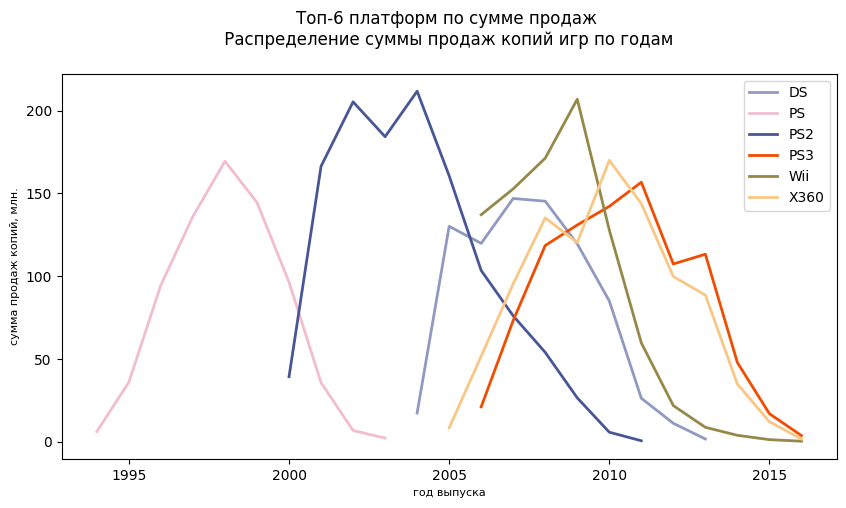

In [39]:
# выберем топ-6 платформ по продажам и посмотрим как менялись продажи по годам
top_pl = df_pl['platform'][:6].to_list()

# вызовем функцию plot_n
plot_n(top_pl, 'Топ-6 платформ по сумме продаж' )

В `топ-6` платформ по сумме продаж вошли следующие платформы:
1. **PS2** (PlayStation 2) от Sony,  время реализации с 2000 - 2011 г, общие продажи - 1255.77
2. **X360** (Xbox 360) от Microsoft, время реализации с 2005 - 2016 г, общие продажи -  971.42
3. **PS3** (PlayStation 3) от Sony,  время реализации с 2006 - 2016 г, общие продажи -  939.64
4. **Wii** (7-е поколение)от Nintendo, время реализации с 2006 - 2016 г, общие продажи -  907.51
5. **DS** (карманная игровая консоль) от Nintendo, с 2004 - 2013 г,      общие продажи -  806.12
6. **PS** (PlayStation 1) от Sony, время реализации  с 1994 - 2003 г,   общие продажи -  730.86

Стоит отметить, что 3 платформы(X360, PS3, Wii) имели продажи в 2016 г., но в последние года виден их спад.


Построим графики для  PlayStation, Nintendo, Xbox

In [40]:
# создадим список платформ
playstation = df[df['platform'].str.contains('PS')]['platform'].unique()
xbox = df[df['platform'].str.contains('^X+')]['platform'].unique()
nintendo = ['Wii', 'WiiU', 'DS', '3DS', 'N64', 'SNES', 'NES', 'GBA']

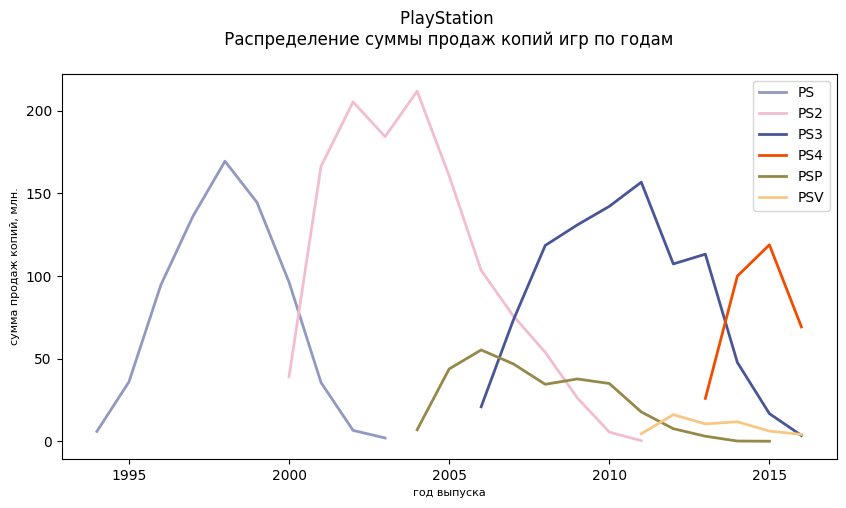

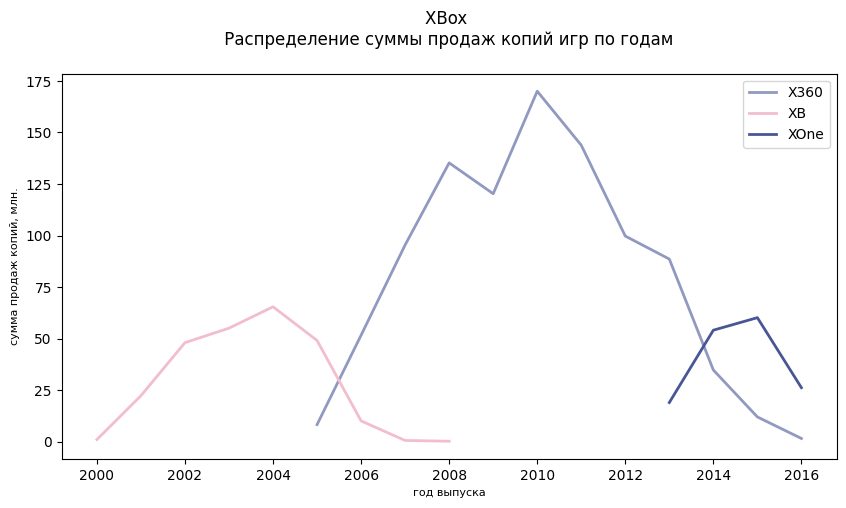

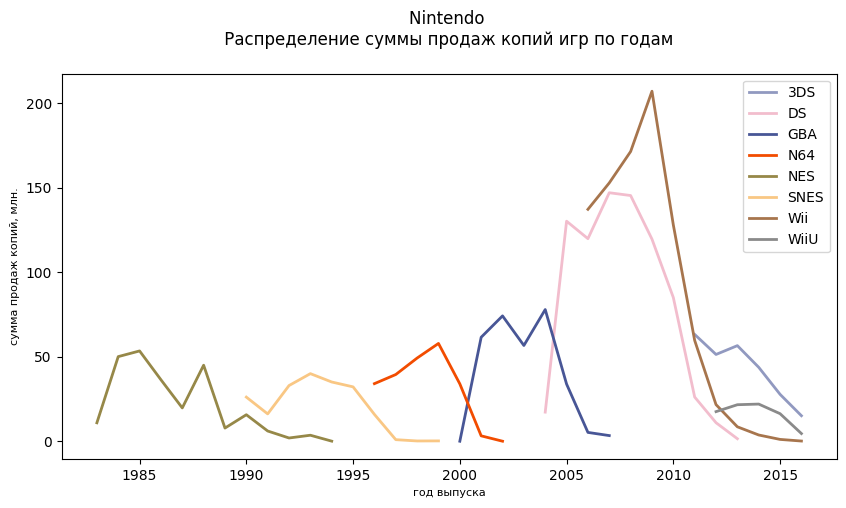

In [41]:
# вызовем функцию plot_n
plot_n(playstation, 'PlayStation')
plot_n(xbox, 'XBox')
plot_n(nintendo, 'Nintendo')

Видно, что платформа существует 10 лет, первые годы идет рост, выходит на плато, которое длится около 5 лет, далее идет снижение кол-ва продаж, на снижении, где-то на 6-7 год жизни предыдущей платформа, производитель выпускает новую. Но рынок компьютерных игр динамичный, в нем происходят изменения, так с учетом роста популярности мобильных игр, скорее всего "жизнь" платформ будет изменяться в меньшую сторону, а портативные консоли станут неинтересны покупателям. 

In [42]:
# посмотрим сколько лет существовали разные платформы
lifetime_pl = (
     df[df['year_of_release'] != 1]
    .groupby('platform', as_index=False)['year_of_release']
    .agg(['min','max'])
    .assign(diff = lambda x:x['max']-x['min'])
    .sort_values(by=['diff'], ascending=False)
)
display(lifetime_pl.T)
print('Средний количество лет существования платформ: ', lifetime_pl['diff'].mean())
print('Медианное количество лет существования платформ: ', lifetime_pl['diff'].median())

platform,PC,GB,NES,X360,PSP,PS2,DC,Wii,PS3,2600,SNES,PS,DS,XB,GBA,GC,N64,SAT,3DS,PSV,WiiU,GEN,NG,PS4,XOne,WS,SCD,3DO,TG16,GG,PCFX
min,1985,1988,1983,2005,2004,2000,1998,2006,2006,1980,1990,1994,2004,2000,2000,2001,1996,1994,2011,2011,2012,1990,1993,2013,2013,1999,1993,1994,1995,1992,1996
max,2016,2001,1994,2016,2015,2011,2008,2016,2016,1989,1999,2003,2013,2008,2007,2007,2002,1999,2016,2016,2016,1994,1996,2016,2016,2001,1994,1995,1995,1992,1996
diff,31,13,11,11,11,11,10,10,10,9,9,9,9,8,7,6,6,5,5,5,4,4,3,3,3,2,1,1,0,0,0


Средний количество лет существования платформ:  7.0
Медианное количество лет существования платформ:  6.0


**Анализ продаж по платформам за актуальный период**

Учитывая график кол-ва выпускаемых игр, а также появление новых консолей крупных производителей за последние годы: WiiU -2012, PS4-2013, XOne- 2013, для дальнейшего анализа выберем период с 2012-2016 г

In [43]:
# за актуальное время выберем период с 2012 по 2016 год
actual = df[df['year_of_release'] >= 2012]

In [44]:
# посмотрим для начала как менялось кол-во выпускаемых игр для платформ по годам
(
    actual
    .pivot_table(index = 'year_of_release', 
                 columns ='platform', values = 'name', aggfunc='nunique', margins=True)
    .fillna('')
    
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
year_of_release,,,,,,,,,,,,
2012,93.0,23.0,61.0,147.0,,106.0,53.0,31.0,32.0,106.0,,446
2013,91.0,8.0,38.0,126.0,16.0,54.0,63.0,12.0,42.0,75.0,19.0,335
2014,80.0,,47.0,108.0,75.0,10.0,100.0,6.0,31.0,63.0,61.0,319
2015,86.0,,50.0,73.0,137.0,3.0,110.0,4.0,28.0,35.0,80.0,362
2016,46.0,,54.0,38.0,164.0,,85.0,1.0,14.0,13.0,87.0,297
All,396.0,31.0,250.0,492.0,392.0,173.0,411.0,54.0,147.0,292.0,247.0,1671


Стоит отметить, что рост кол-ва выпускаемых игр в последние годы отмечается для PS4, XOne, а также для PC (несмотря на значительное сокращение в 2013г)

In [45]:
# создадим функцию для отображения значений на графиках
def signature(chart, n):
    for p in chart.patches:
             chart.annotate(n %  p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

In [46]:
# создадим функцию для графиков 
def bar_box(df, col, rot, x, y1, y2, tit):
    plt.figure(figsize=(20, 6))
    # построим столбиковую диаграмму
    ax1 = plt.subplot(1, 2, 1)
    chart = df.groupby(col)['total_sales'].agg('sum').sort_values(ascending=False).plot.bar(color=palette[0],
                                                                                        width=0.8,
                                                                                        ax=ax1)
    plt.ylabel('сумма продаж копий, млн.', fontsize='10')
    plt.ylim(-1, y1)
    plt.xlabel(x, fontsize='10')
    plt.xticks(fontsize='14', rotation=rot)
    plt.legend().set_visible(False)
    plt.title('Общая сумма продаж для разных ' + tit , fontsize='14')
    signature(chart, "%.1f")

    # построим боксплот 
    ax2 = plt.subplot(1, 2, 2)
    sns.boxplot(x= col, y= 'total_sales', data= df, 
            color = palette[0],  ax=ax2)
    plt.xticks(fontsize='14', rotation=rot)
    plt.xlabel(x, fontsize='10')
    plt.ylabel('сумма продаж копий, млн.', fontsize='10')
    plt.ylim(0, y2)
    plt.title('Диаграмма размаха суммы продаж ' + tit, fontsize='14')
    plt.show()

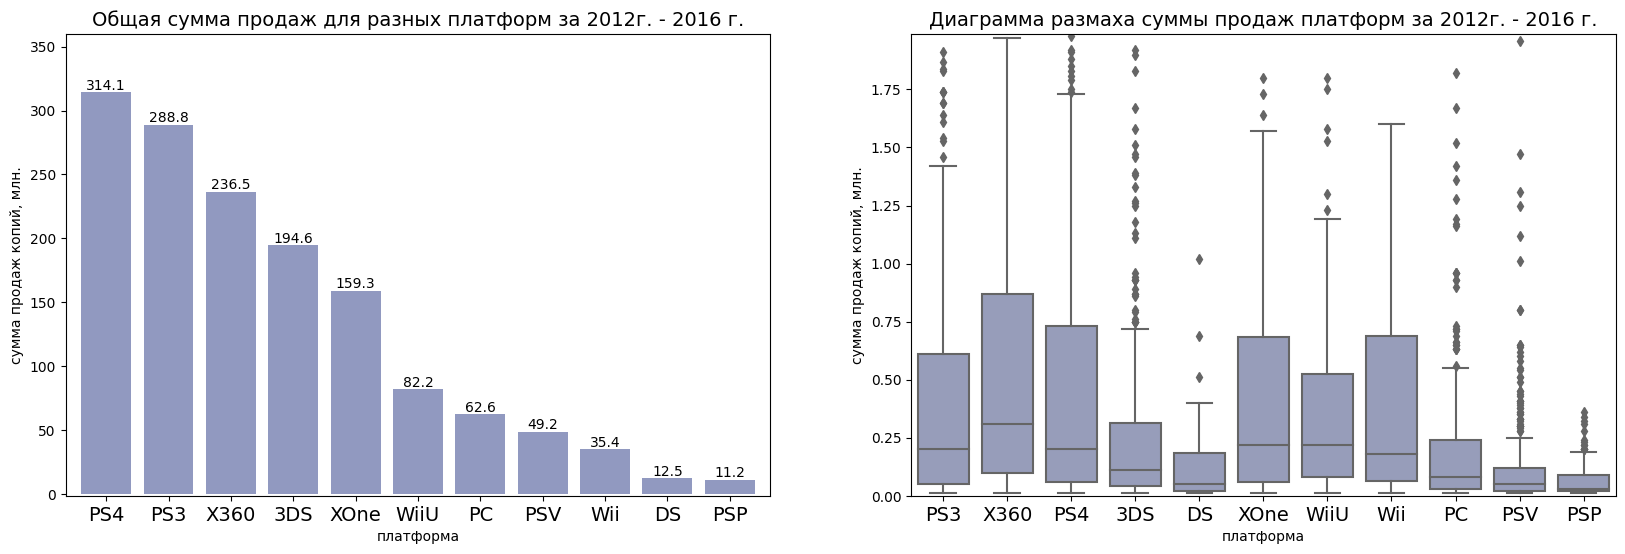

In [47]:
# построим графики с общей суммой продаж по платформам за актуальный период, вызовим функцию bar_box()
bar_box(actual,'platform', 0, 'платформа', 360, 1.99, 'платформ за 2012г. - 2016 г.')

In [48]:
# посмотрим на средние и медианные значения по платформам 
actual.groupby('platform', as_index=False)['total_sales'].agg(['median', 'mean']).sort_values(by='mean', ascending=False)

,median,mean
platform,,
X360,0.31,0.810068
PS4,0.20,0.801378
Wii,0.18,0.655000
XOne,0.22,0.645020
PS3,0.20,0.586951
WiiU,0.22,0.559116
3DS,0.11,0.491439
DS,0.05,0.404839
PC,0.08,0.250600


За период 2012-2016 г. по общей сумме продаж копий игр лидирует новая консоль от компании Sony PS4, на вотором месте их предыдущая версия PS3, новые консоли XOne и  WiiU значительно уступают. Если смотреть медианное и среднее значения проданных копий, то данное значение выше у Х360, а вот PS4 среднее значение существенно выше, чем у XOne и  WiiU, но медианна несколько ниже. Для всех платформ видны выбросы и соответственно средние значения в разы выше медианных

In [49]:
# посмотрим как менялись суммы продаж для разных платформ по годам
(
    actual
    .pivot_table(index = 'year_of_release', 
                 columns ='platform', values = 'total_sales', aggfunc='sum', margins=True)
    .fillna('')
    
)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,All
year_of_release,,,,,,,,,,,,
2012,51.36,11.01,23.22,107.35,,7.69,16.19,21.71,17.56,99.74,,355.83
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96,361.24
2014,43.76,,13.28,47.76,100.0,0.24,11.90,3.75,22.03,34.74,54.07,331.53
2015,27.78,,8.52,16.82,118.9,0.12,6.25,1.14,16.35,11.96,60.14,267.98
2016,15.14,,5.25,3.60,69.25,,4.25,0.18,4.60,1.52,26.15,129.94
All,194.61,12.55,62.65,288.78,314.14,11.19,49.18,35.37,82.19,236.54,159.32,1446.52


Стоит отметить, что в 2013 г было выпущено меньше игр по сравению с 2014 и 2015г было выше, а вот проданных копий больше, и с 2014 г наблюдается снижение

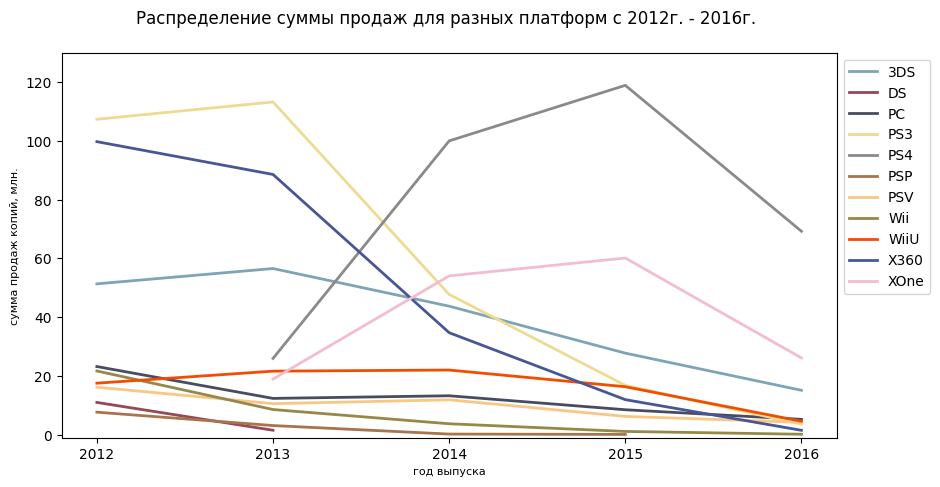

In [50]:
# построим линейный график и посмотрим как менялись суммы продаж для разных платформ по годам
( actual
    .pivot_table(index = 'year_of_release', 
                 columns ='platform', values = 'total_sales', aggfunc='sum').plot(linewidth= 2.0, 
                                                                                  color=palette[::-1], 
                                                                                  figsize =(10,5))
)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('год выпуска', fontsize='8')
plt.xticks(actual['year_of_release'].unique())
plt.ylabel('сумма продаж копий, млн.', fontsize='8')
plt.ylim(-1, 130)
plt.title('Распределение суммы продаж для разных платформ c 2012г. - 2016г. \n  ', fontsize='12')
plt.show()

Видно, что с 2014 года продажи выше у PS4 и XOne, и в 2015 году у них у единственных наблюдался рост продаж копий игр, но в 2016 год наблюдается снижение показателей.

**Влияние на продажи внутри платформы отзывов пользователей и критиков**
<a id="3"></a>

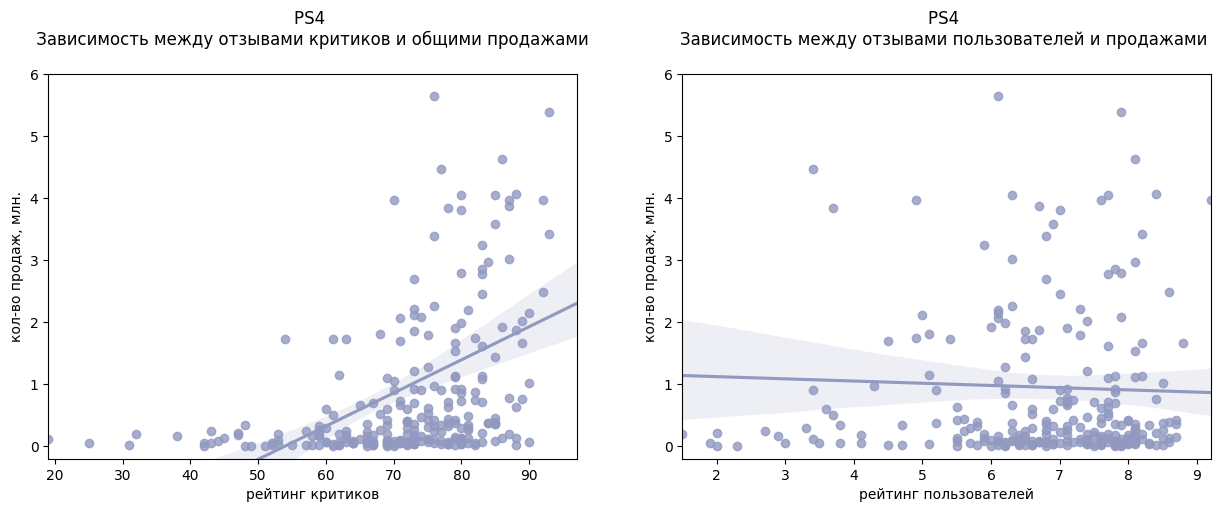

In [51]:
# построим regplot для PS4 
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
sns.regplot(data = actual[actual['platform'] == 'PS4'], x= 'critic_score', y ="total_sales",
             color= palette[0],
                 ax=ax1)

plt.title('PS4 \n Зависимость между отзывами критиков и общими продажами \n ', fontsize='12')
plt.ylabel('кол-во продаж, млн.')
plt.ylim(-0.2, 6)
plt.xlabel('рейтинг критиков')

ax2 = plt.subplot(1, 2, 2)
sns.regplot(data = actual[actual['platform'] == 'PS4'], x= 'user_score', y ="total_sales", 
             color= palette[0],
                 ax=ax2)

plt.title('PS4 \nЗависимость между отзывами пользователей и продажами \n', fontsize='12')
plt.ylabel('кол-во продаж, млн.')
plt.ylim(-0.2, 6)
plt.xlabel('рейтинг пользователей')
plt.show()

Для PS4 между рейтингом критиков и кол-вом продаж наблюдается положительная корреляция, а вот между рйтингом пользователей и продажами корреляция не прослеживается.

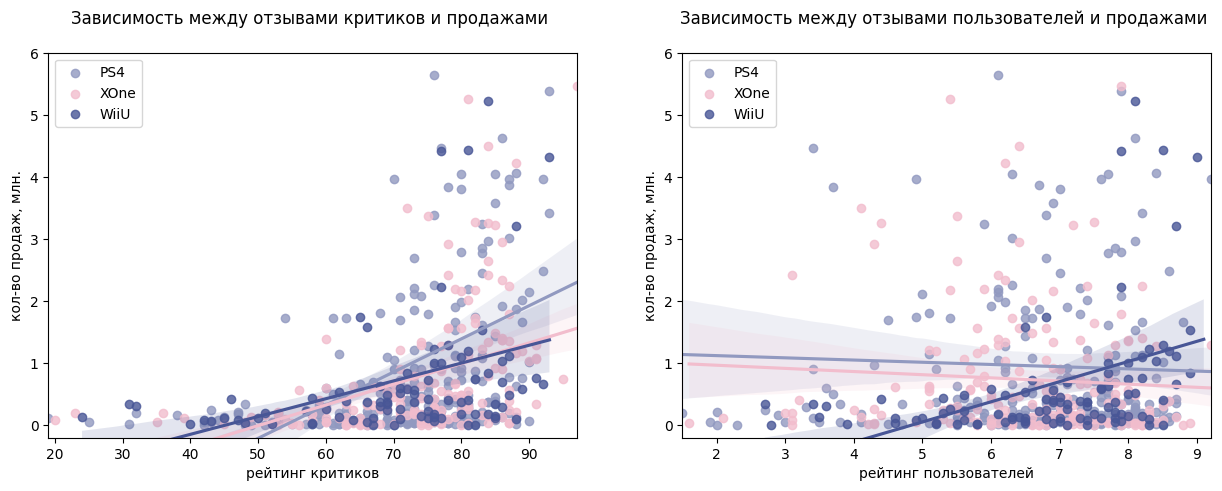

In [52]:
# построим regplot для популярных платформ PS4, XOne, WiiU
plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 2, 1)
colors = palette[:3]
for i, value in enumerate(['PS4','XOne','WiiU']):
    ax=sns.regplot(x="critic_score", y="total_sales", ax=ax1,
                     data=actual[actual['platform']== value],
                     color=colors[i],
                     label=value,  fit_reg=True)
plt.legend(loc='upper left')
plt.xlabel('рейтинг критиков')
plt.ylabel('кол-во продаж, млн.')
plt.ylim(-0.2,6)
plt.title('Зависимость между отзывами критиков и продажами \n ', fontsize='12')

ax2 = plt.subplot(1, 2, 2)
colors = palette[:3]
for i, value in enumerate(['PS4','XOne','WiiU']):
    ax=sns.regplot(x="user_score", y="total_sales", ax=ax2,
                     data=actual[actual['platform'] == value],
                     color=colors[i],
                     label=value, fit_reg=True)
plt.legend(loc='upper left')
plt.xlabel('рейтинг пользователей')
plt.ylabel('кол-во продаж, млн.')
plt.ylim(-0.2,6)
plt.title('Зависимость между отзывами пользователей и продажами \n ', fontsize='12')

plt.show()

График зависимости между отзывами критиков и продажами для всех 3-х платформ во многом схож. Что касается зависимости между отзывыми пользователей и продажами, то для Wii, в отличие от 2-х других платформ видна положительная корреляция

In [53]:
# посчитаем корреляцию для всех платформ
print('Все платформы')
display(actual[['total_sales', 'critic_score', 'user_score']].corr().drop('total_sales', axis=1)[:1])
 

# посчитаем корреляцию отдельно для топ-3 популярных платформ в 2016 году
for i in ['PS4','XOne','WiiU']:
    print()
    print(i)
    display(actual[actual['platform'] == i][['total_sales', 'critic_score', 'user_score']].corr()\
    .drop('total_sales', axis=1)[:1])

Все платформы


,critic_score,user_score
total_sales,0.308633,0.004194



PS4


,critic_score,user_score
total_sales,0.406568,-0.031957



XOne


,critic_score,user_score
total_sales,0.416998,-0.068925



WiiU


,critic_score,user_score
total_sales,0.34838,0.400219


По всем платформам мы видим слабую положительную корреляцию между отзывами критиков и продажами, для PS4 и XOne несколько выше. Для всех платфор и PS4 и XOne корреляции между рейтингами пользователей и продажами нет. Для WiiU между рейтингами пользователей и продажами имеется слабая положительная корреляция и коэффицент выше, чем для рейтингов критиков.

**Анализ продаж по жанрам за актуальный период**
<a id="4"></a>

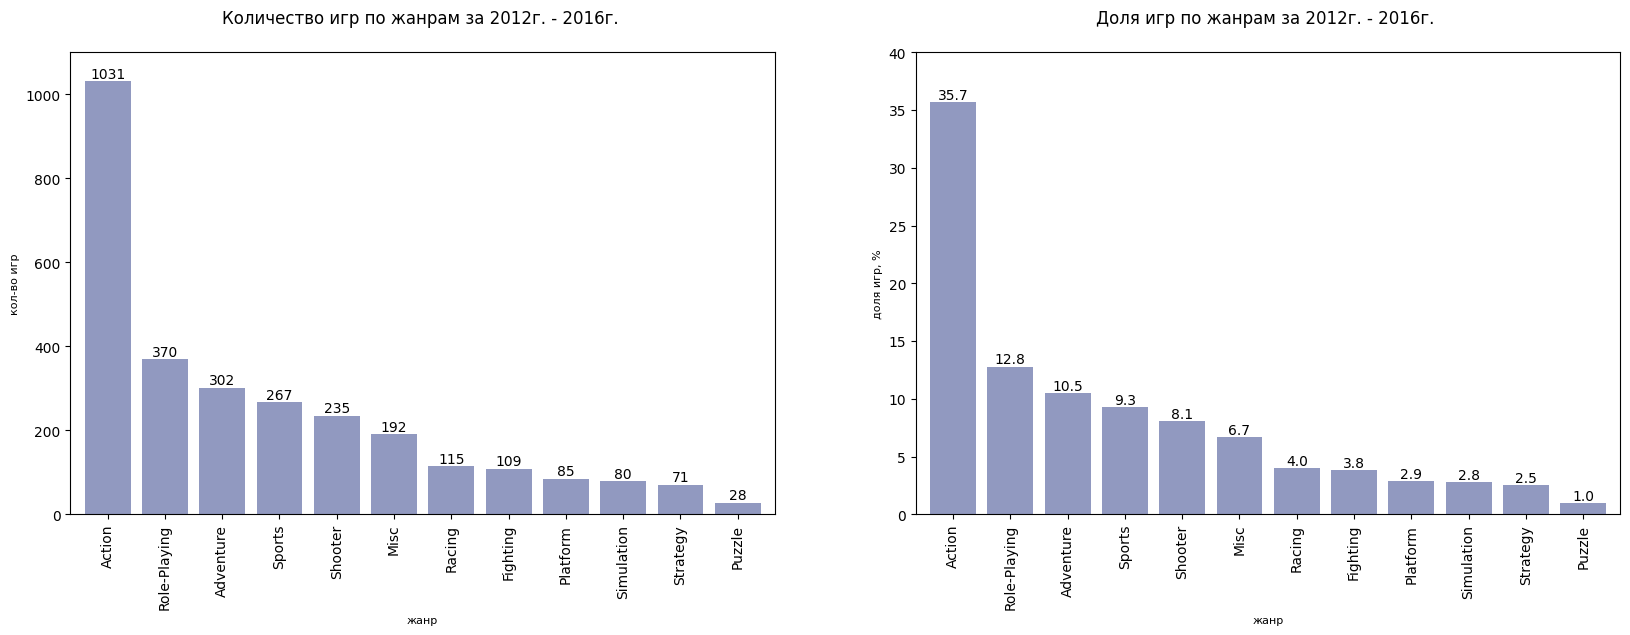

In [54]:
# построим столбиковую диаграмму с количеством игр по жанрам за 2012-2016 год 
plt.figure(figsize=(20, 6))
ax1 = plt.subplot(1, 2, 1)
chart = actual['genre'].value_counts().plot.bar(color=palette[0], width=0.8, rot=90, ax=ax1)
plt.ylabel('кол-во игр', fontsize='8')
plt.ylim(0, 1100)
plt.xlabel('жанр', fontsize='8')
plt.legend().set_visible(False)
plt.title('Количество игр по жанрам за 2012г. - 2016г. \n  ', fontsize='12')
signature(chart, "%.0f")

# построим столбиковую диаграмму с распределением доли игр по жанрам за 2012-2016 год 
ax2 = plt.subplot(1, 2, 2)
chart = actual['genre'].value_counts(normalize=True).apply(lambda x: round(x * 100, 1)).\
                                                           plot.bar(color=palette[0], width=0.8, rot=90, ax=ax2)
plt.ylabel('доля игр, %', fontsize='8')
plt.ylim(0, 40)
plt.xlabel('жанр', fontsize='8')
plt.legend().set_visible(False)
plt.title('Доля игр по жанрам за 2012г. - 2016г. \n  ', fontsize='12')
signature(chart, "%.1f")
plt.show()                                     

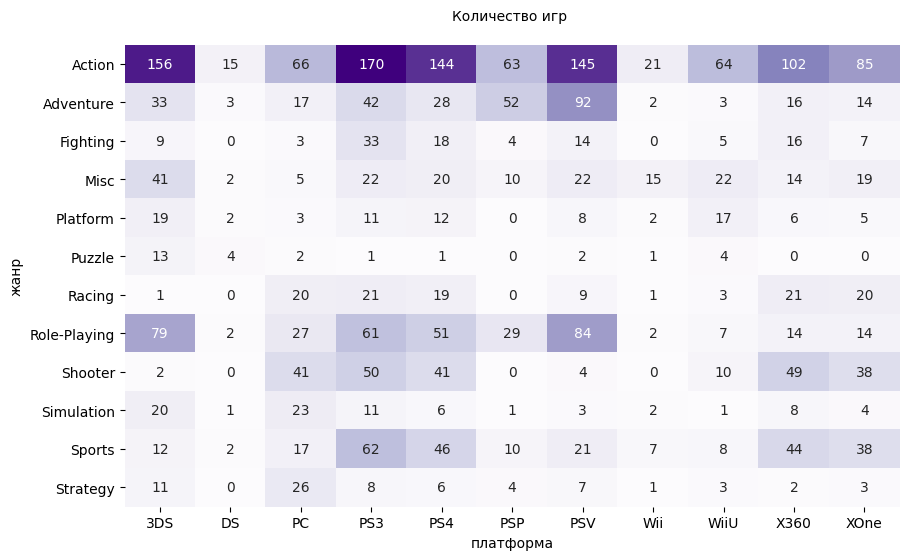

In [55]:
# посмотрим на кол-во вышедших игр для платформ в разных жанрах
plt.figure(figsize=(10, 6))
(
  sns.heatmap(actual
    .pivot_table(index= 'genre', 
                 columns='platform', values= 'name', aggfunc='count')
    .fillna(0), annot = True,  cbar=False, cmap= 'Purples', fmt='g')
    
)
plt.xlabel('платформа')
plt.ylabel('жанр')
plt.title('Количество игр \n ', fontsize='10')
plt.show()

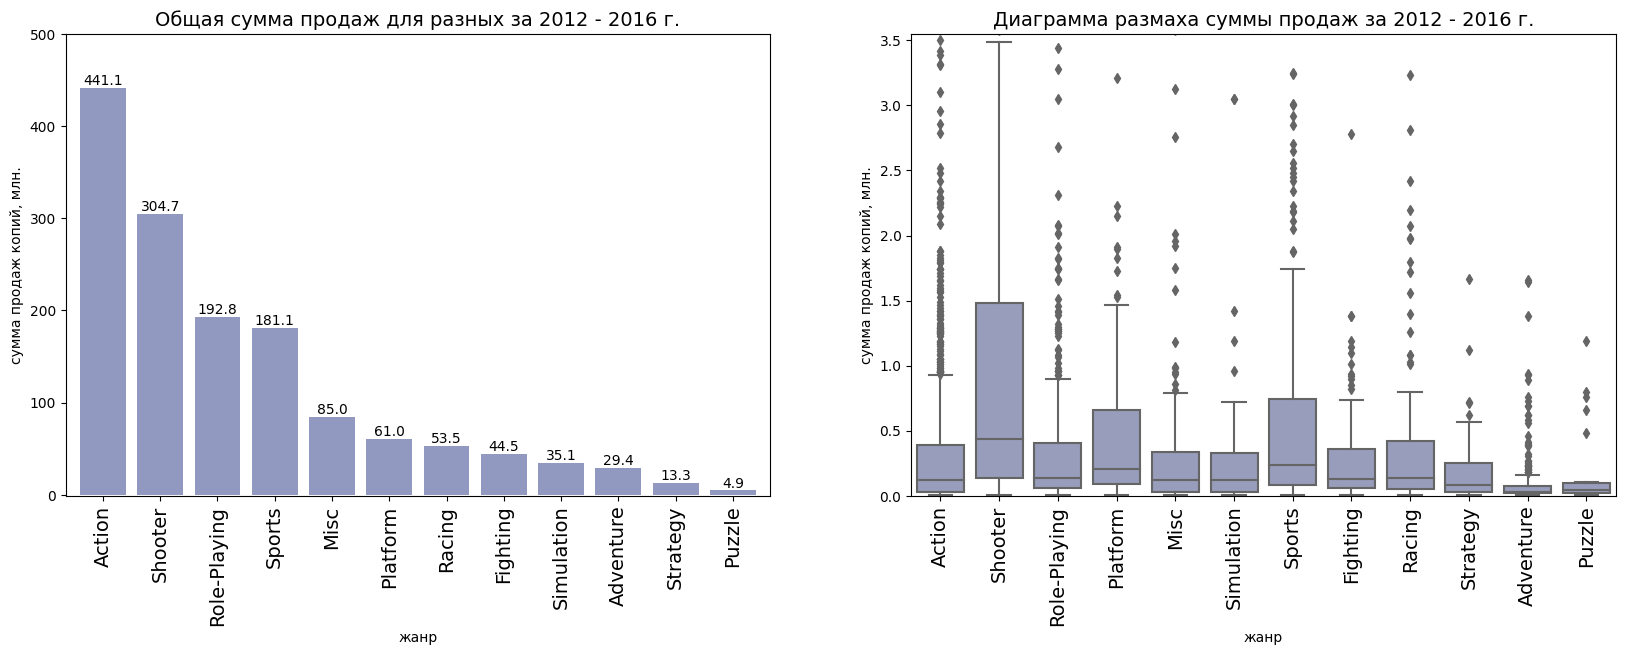

In [56]:
# построим графики для разных жанров игр за 2012-2016 год, вызовим функцию bar_box()
bar_box(actual, 'genre', 90, 'жанр', 500, 3.55, 'за 2012 - 2016 г.' )

In [57]:
# посмотрим на средние и медианные значения по жанрам 
actual.groupby('genre', as_index=False)['total_sales'].agg(['median', 'mean']).sort_values(by='mean', ascending=False)

,median,mean
genre,,
Shooter,0.440,1.296723
Platform,0.210,0.717647
Sports,0.240,0.678127
Role-Playing,0.140,0.521081
Racing,0.140,0.465217
Misc,0.120,0.442917
Simulation,0.120,0.439000
Action,0.120,0.427856
Fighting,0.130,0.408165


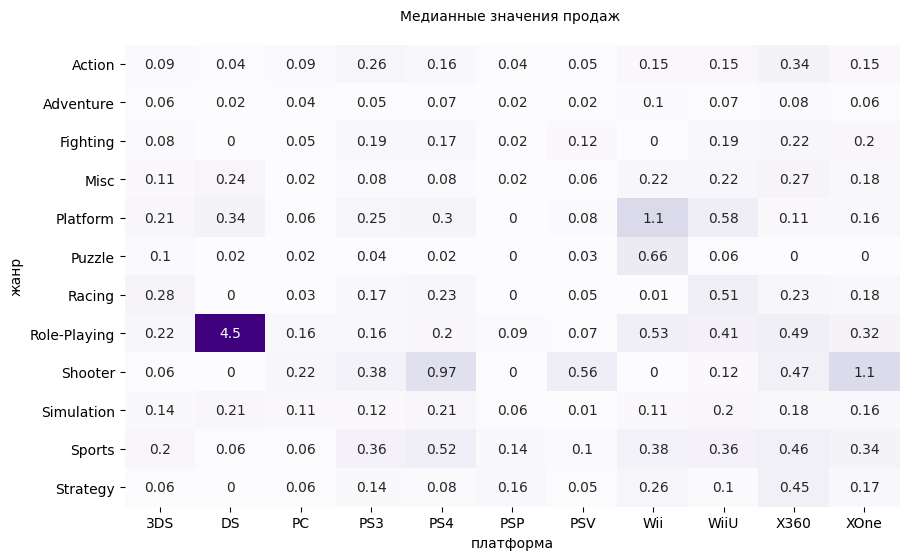

In [58]:
# посмотрим как распределились медианные значения продаж по жанрам для каждой платформы
plt.figure(figsize=(10, 6))
(
  sns.heatmap(actual
    .pivot_table(index = 'genre', 
                 columns ='platform', values = 'total_sales', aggfunc='median').round(2)
    .fillna(0), annot = True,  cbar=False, cmap= 'Purples')
    
)
plt.xlabel('платформа')
plt.ylabel('жанр')
plt.title('Медианные значения продаж \n ', fontsize='10')
plt.show()

За 2012-2016г больше всего выпускалось игр для жанра Action(35.7%), RPG(12,8%), Adventure(10.5%).  
По общему кол-ву продаж также лидирует жанр Action, 2-е место Shooter, 3-е  игры жанра RPG. А вот Adventure по кол-ву продаж  оказались на последних местах.  
Если смотреть на медианные и средние значения, то игры жанра Shooter показывают наивысший результат, почти в 2 раза опережают жанр Platform и Sports. Наилучшие медианный значения кол-ва продаж игры жанра Shooter имеют платформы XOne и PS4.  
Для жанра Action видна большая конкуренция и не все игры показывают хорошие результаты.  
Игры жанра Puzzle и Strategy на последних местах по всем показателям.

## Портрет пользователя каждого региона
<a id="region"></a>

In [59]:
# посмотрим на общие продажи по регионам за 2012-2016г
# переведем форму таблицы actual из широкого в длинный  и далее сгрупируем по регионам
actual_melt = pd.melt(actual, id_vars =['name','platform','year_of_release', 'rating'], 
                          value_vars =['eu_sales', 'na_sales', 'jp_sales', 'other_sales'],
                          var_name ='region', value_name ='sales')
actual_melt.groupby('region', as_index=False)['sales'].agg('sum').sort_values(by='sales', ascending=False)

,region,sales
2,na_sales,590.97
0,eu_sales,506.81
1,jp_sales,192.58
3,other_sales,156.16


Продажи в Америке и Европе значительно превосходят Японию и другие страны.

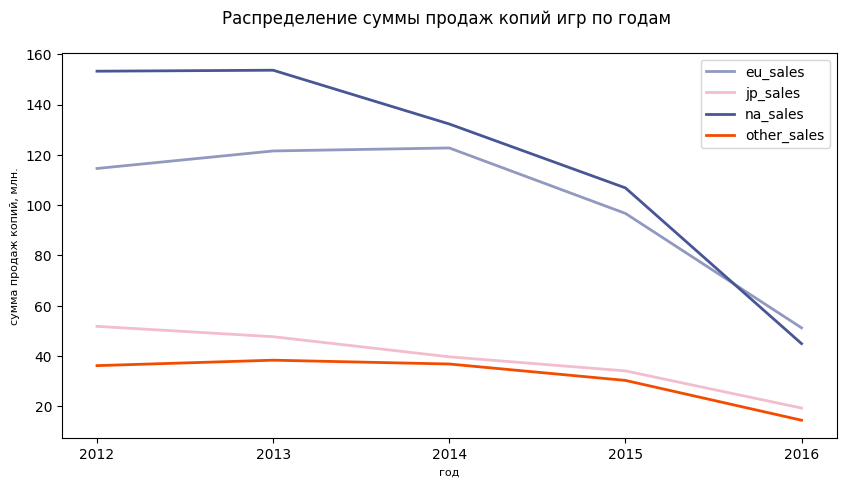

In [60]:
# посмотрим на динамику продаж по годам 
(
    actual_melt
    .pivot_table(index = 'year_of_release', columns ='region', values = 'sales', aggfunc='sum')
    .plot(linewidth= 2.0, color=palette, figsize =(10,5))
)
plt.legend()
plt.xlabel('год', fontsize='8')
plt.ylabel('сумма продаж копий, млн.', fontsize='8')
plt.xticks(actual_melt['year_of_release'].unique())
plt.title('Распределение суммы продаж копий игр по годам \n  ', fontsize='12')
plt.show()

Америка лидировала до 2015 г, в 2016г Америка уступила лидерство Европе, но данные за 2016 г могут быть неполными, поэтому это может быть и не так. Но видно, что снижение продаж в Америке идет быстрее и большой разницы, как в 2012 году, с 2014 года уже не наблюдается. Также стала минимальной разница и между Японией и другими странами. 

In [61]:
# функция для группировки данных по признаку и подсчета суммы продаж
def group_region(data, col1, col2):
    return  data.groupby(col1, as_index=False)[col2].agg('sum')\
        .assign(share = lambda x: (x[col2]/x[col2].sum()*100).round(1))\
        .sort_values(by='share', ascending=False)
    

In [62]:
# вызовем функцию group_region и посмотрим на сумму продаж по платформам в Америке, Европе и Японии
na_platform = group_region(actual, 'platform', 'na_sales')
print('Северная Америка')
display(na_platform.T)
na_platform = na_platform.head(5)

eu_platform = group_region(actual, 'platform', 'eu_sales')
print('Европа')
display(eu_platform.T)
eu_platform = eu_platform.head(5)

jp_platform = group_region(actual, 'platform', 'jp_sales')
print('Япония')
display(jp_platform.T)
jp_platform = jp_platform.head(5)

Северная Америка


,9,4,3,10,0,8,2,7,6,1,5
platform,X360,PS4,PS3,XOne,3DS,WiiU,PC,Wii,PSV,DS,PSP
na_sales,140.05,108.74,103.38,93.12,55.31,38.1,19.12,17.45,10.98,4.59,0.13
share,23.7,18.4,17.5,15.8,9.4,6.4,3.2,3.0,1.9,0.8,0.0


Европа


,4,3,9,10,0,2,8,7,6,1,5
platform,PS4,PS3,X360,XOne,3DS,PC,WiiU,Wii,PSV,DS,PSP
eu_sales,141.09,106.85,74.52,51.59,42.64,37.76,25.13,11.92,11.36,3.53,0.42
share,27.8,21.1,14.7,10.2,8.4,7.5,5.0,2.4,2.2,0.7,0.1


Япония


,0,3,6,4,8,5,1,7,9,10,2
platform,3DS,PS3,PSV,PS4,WiiU,PSP,DS,Wii,X360,XOne,PC
jp_sales,87.79,35.29,21.04,15.96,13.01,10.47,3.72,3.39,1.57,0.34,0.0
share,45.6,18.3,10.9,8.3,6.8,5.4,1.9,1.8,0.8,0.2,0.0


In [63]:
# функция для постороения графиков
def region_plot(data, col1, col2, x, n, tit):
    
    axes[x].barh(data[col1], data[col2], color=palette[0], height=0.8)
# убираем границы графика
    for s in ['top', 'bottom', 'left', 'right']:
        axes[x].spines[s].set_visible(False)
# работаем с осями
    axes[x].xaxis.set_ticks_position('none')
    axes[x].xaxis.set_tick_params(labelcolor='w')
    axes[x].set_xlim((0, n))
    axes[x].yaxis.set_tick_params(labelsize=12)
    axes[x].invert_yaxis()
    
# добавляем значения к барам
    for i in axes[x].patches:
        axes[x].text(i.get_width()+0.2, i.get_y()+0.455,
             str(round((i.get_width()), 1)),
             fontsize=10,  
             color='black')
# заголовок
    axes[x].set_title(tit, loc='left', fontsize=12)
    

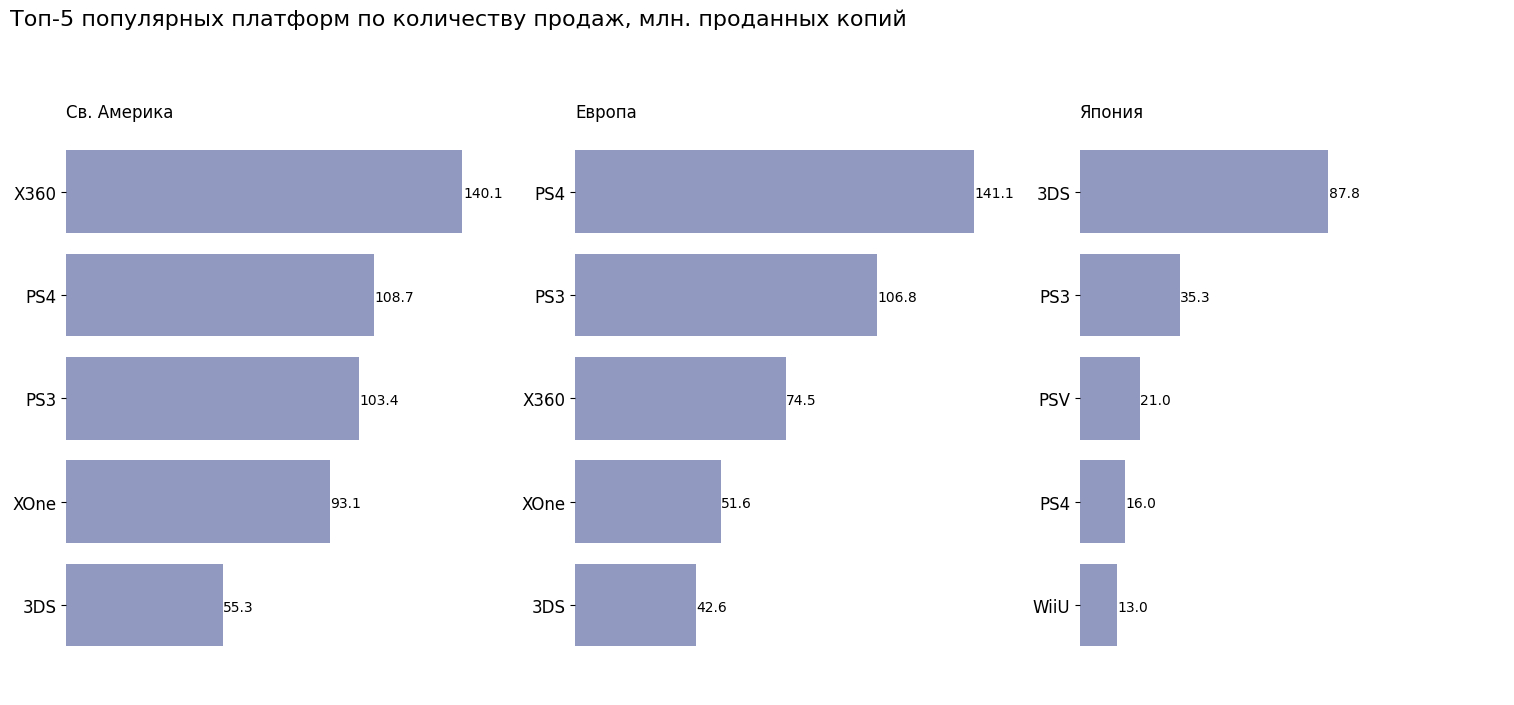

In [64]:
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15, 6))
fig.suptitle('Топ-5 популярных платформ по количеству продаж, млн. проданных копий',  y=1.15, x=0.3, fontsize=16) 
region_plot(na_platform, 'platform', 'na_sales', 0, 150, 'Св. Америка')
region_plot(eu_platform, 'platform', 'eu_sales', 1, 150, 'Европа')
region_plot(jp_platform, 'platform', 'jp_sales', 2, 150, 'Япония')


 Видно, что в 5-ку лучших в Америке и Европе вошли одинаковые платформы, только отличается 3-ка лидеров, в Америке лидирует X360, в Европе PS4. В Японии на 1-м месте портативная платформа 3DS от Nintendo. Стоит отметить, что в Японии в 5-ку не вошли платформы от компании Microsoft,  а также в Японии портативные платформы более популярны, чем в Америке и Европе

In [65]:
# вызовем функцию group_region и посмотрим на сумму продаж по жанрам в Америке, Европе и Японии
na_genre = group_region(actual, 'genre', 'na_sales')
print('Северная Америка')
display(na_genre.T)
na_genre = na_genre.head(5)

eu_genre = group_region(actual, 'genre', 'eu_sales')
print('Европа')
display(eu_genre.T)
eu_genre = eu_genre.head(5)

jp_genre = group_region(actual, 'genre', 'jp_sales')
print('Япония')
display(jp_genre.T)
jp_genre = jp_genre.head(5)

Северная Америка


,0,8,10,7,3,4,2,6,1,9,11,5
genre,Action,Shooter,Sports,Role-Playing,Misc,Platform,Fighting,Racing,Adventure,Simulation,Strategy,Puzzle
na_sales,177.84,144.77,81.53,64.0,38.19,25.38,19.79,17.22,8.92,7.97,4.23,1.13
share,30.1,24.5,13.8,10.8,6.5,4.3,3.3,2.9,1.5,1.3,0.7,0.2


Европа


,0,8,10,7,6,3,4,9,2,1,11,5
genre,Action,Shooter,Sports,Role-Playing,Racing,Misc,Platform,Simulation,Fighting,Adventure,Strategy,Puzzle
eu_sales,159.34,113.47,69.08,48.53,27.29,26.32,21.41,14.55,10.79,9.46,5.17,1.4
share,31.4,22.4,13.6,9.6,5.4,5.2,4.2,2.9,2.1,1.9,1.0,0.3


Япония


,7,0,3,9,2,8,4,1,10,11,6,5
genre,Role-Playing,Action,Misc,Simulation,Fighting,Shooter,Platform,Adventure,Sports,Strategy,Racing,Puzzle
jp_sales,65.44,52.8,12.86,10.41,9.44,9.23,8.63,8.24,8.01,2.88,2.5,2.14
share,34.0,27.4,6.7,5.4,4.9,4.8,4.5,4.3,4.2,1.5,1.3,1.1


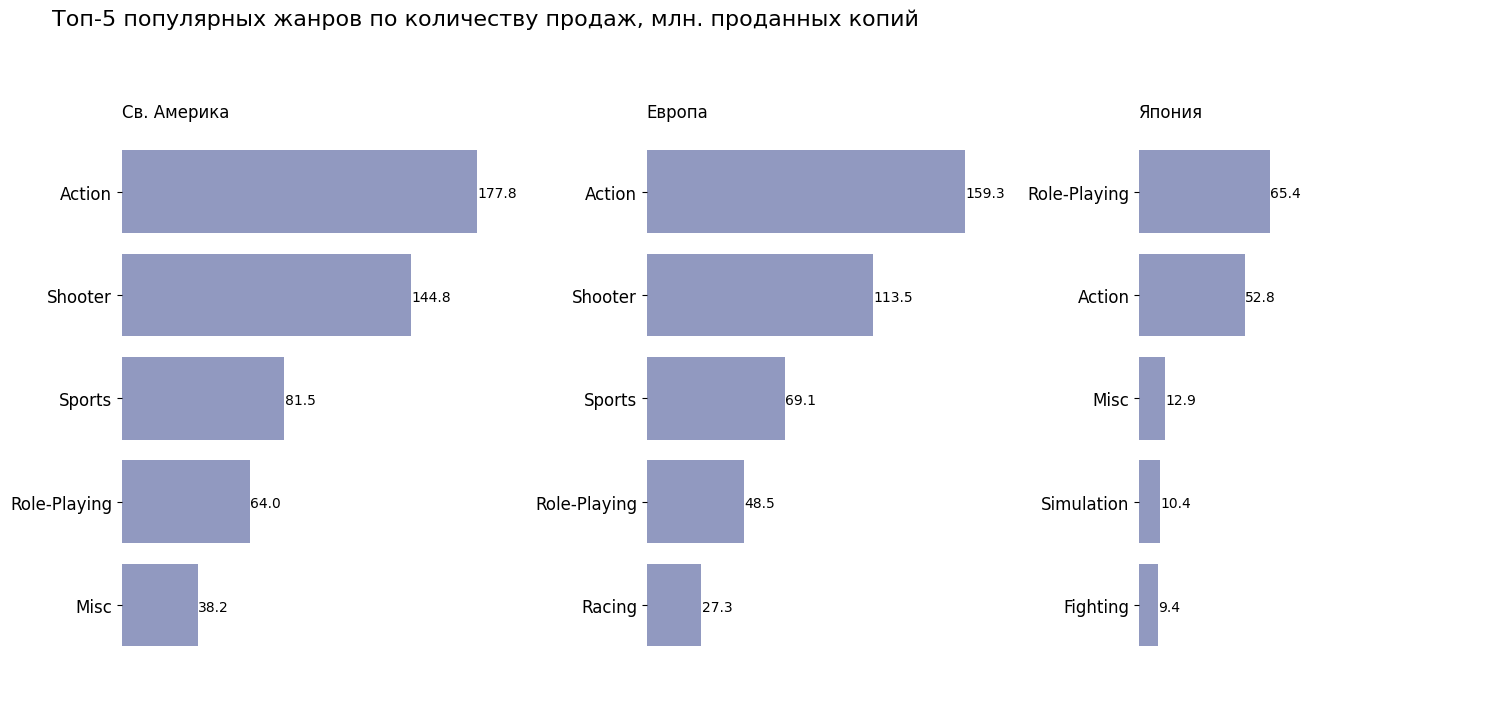

In [66]:
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15, 6))
fig.suptitle('Топ-5 популярных жанров по количеству продаж, млн. проданных копий', y=1.15, x=0.32,  fontsize=16)

region_plot(na_genre, 'genre', 'na_sales', 0, 180, 'Св. Америка')
region_plot(eu_genre, 'genre', 'eu_sales', 1, 180, 'Европа')
region_plot(jp_genre, 'genre', 'jp_sales', 2, 180, 'Япония')


Заметна большая разница между тем, какие жанры популярны в Японии и в других регионах, что может быть связано разницей менталитетов. Так в Америке и Европе 3-ка идентична и больше всего продаж наблюдается в жанрах Action, Shooter и Sports. В Японии жанры  Shooter и Sports вообще не вошли в 5-ку , а лидирует жанр RPG, жанр Action на 2-м месте. 

In [67]:
# вызовем функцию group_region и посмотрим на сумму продаж по жанрам в Америке, Европе и Японии
na_rating = group_region(actual, 'rating', 'na_sales')
print('Северная Америка')
display(na_rating)

eu_rating = group_region(actual, 'rating', 'eu_sales')
print('Европа')
display(eu_rating)


jp_rating = group_region(actual, 'rating', 'jp_sales')
print('Япония')
display(jp_rating)


Северная Америка


,rating,na_sales,share
2,M,231.57,39.2
0,E,114.37,19.4
4,no_rating,103.31,17.5
1,E10+,75.70,12.8
3,T,66.02,11.2


Европа


,rating,eu_sales,share
2,M,193.96,38.3
0,E,113.02,22.3
4,no_rating,91.50,18.1
1,E10+,55.37,10.9
3,T,52.96,10.4


Япония


,rating,jp_sales,share
4,no_rating,108.84,56.5
0,E,28.33,14.7
3,T,26.02,13.5
2,M,21.20,11.0
1,E10+,8.19,4.3


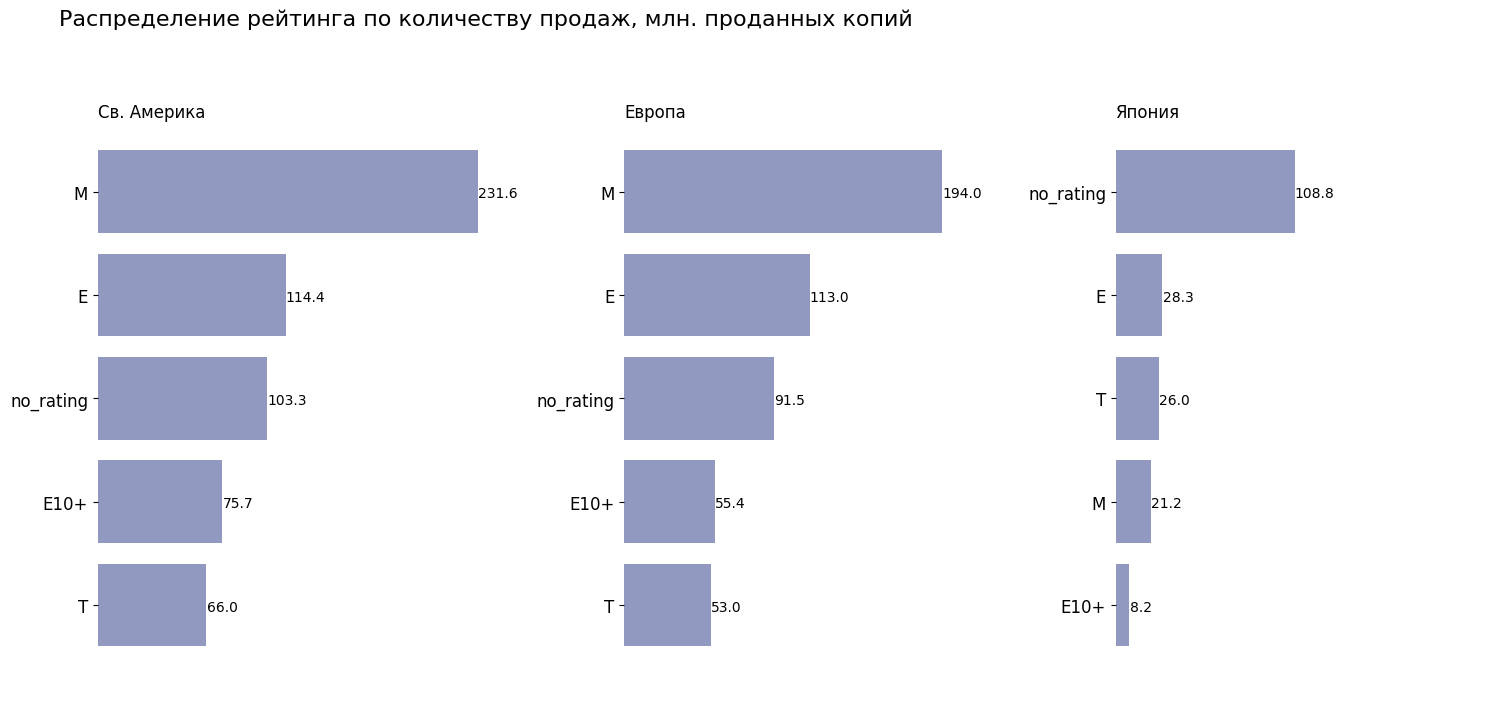

In [68]:
fig, axes = plt.subplots(ncols=3, nrows=1, constrained_layout=True, figsize=(15, 6))
fig.suptitle('Распределение рейтинга по количеству продаж, млн. проданных копий', y=1.15, x=0.32,  fontsize=16)

region_plot(na_rating, 'rating', 'na_sales', 0, 235, 'Св. Америка')
region_plot(eu_rating, 'rating', 'eu_sales', 1, 235, 'Европа')
region_plot(jp_rating, 'rating', 'jp_sales', 2, 235, 'Япония')


И здесь мы видим разницу в регионах, если в Америке и в Европе распределение рейтингов одинаковое и лидируют продаж игр от 17+, то в Японии на первом месте игры без рейтинга. Возможно, что в Японии популярны игры, предназначенные для внутреннего рынка и получение рейтинга для них не столь важно, как для распостранения игр в странах Европы и Америке. На втором месте для всех 3-х регионах располагаются игры для всех возрастов. 

Таким образом, если для пользователей стран Америки и Европы мы видим, что предпочтения во многом схожи, то пользователи из Японии имеют своих лидеров по жанрам, платформам и рейтингам.

## Проверка гипотез
<a id="hypothesis"></a>

In [69]:
# для начала посмотрим на средний пользовательский рейтинг по всем платформам
actual.groupby('platform')['user_score'].mean().sort_values(ascending=False).reset_index()

,platform,user_score
0,PSV,7.410000
1,3DS,7.033333
2,DS,7.000000
3,WiiU,6.904000
4,PS4,6.748249
5,PS3,6.536525
6,XOne,6.521429
7,PC,6.428641
8,X360,6.220851
9,Wii,6.082353


Учитывая, что платформа XOne вышла в 2013 г, а игры для PC существовала и ранее, стоит брать данные с 2013 года

In [70]:
XOne_rating = actual[(actual['year_of_release'] != 2012) & (actual['platform'] == 'XOne')]['user_score'].dropna()
XOne_rating.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [71]:
PC_rating = actual[(actual['year_of_release'] != 2012) & (actual['platform'] == 'PC')]['user_score'].dropna()
PC_rating.describe()

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Видно, что средний пользовательский ретинг для PC за 2013-2016г стал ниже, чем за 2012-2016 г

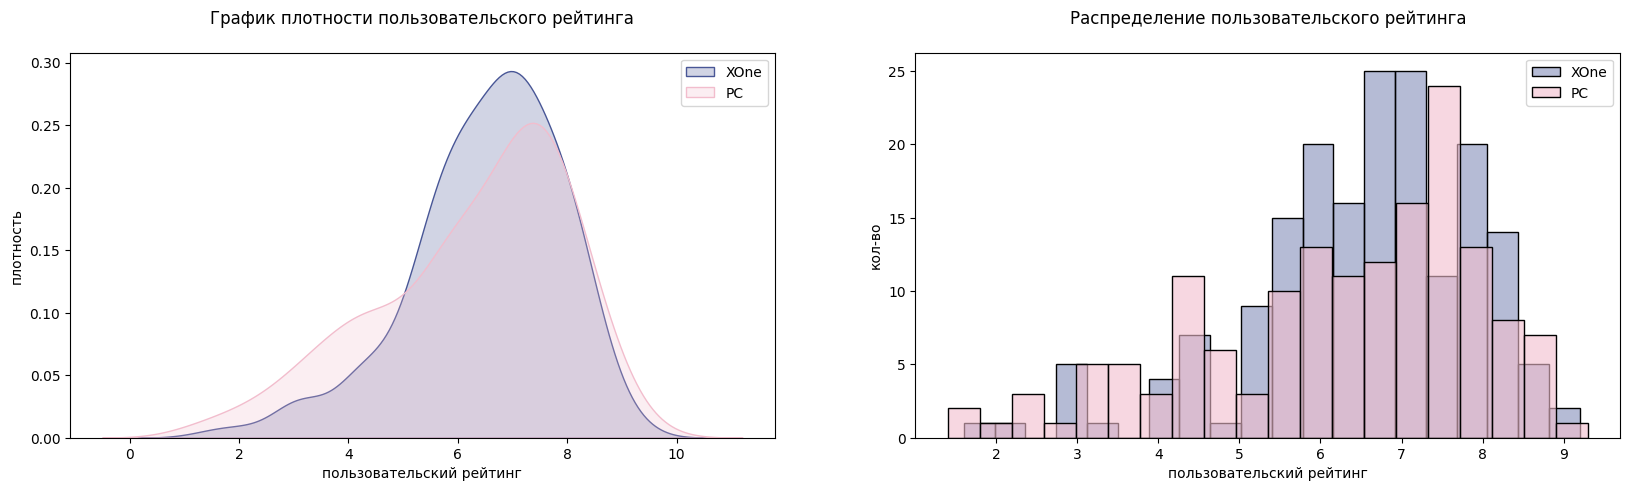

In [72]:
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(XOne_rating, 
            shade=True, color= palette[2], label='XOne', ax=ax1)
sns.kdeplot(PC_rating, color= palette[1], shade=True, label='PC', ax=ax1)
plt.title('График плотности пользовательского рейтинга\n ')
plt.ylabel('плотность')
plt.xlabel('пользовательский рейтинг')
plt.legend()
ax2 = plt.subplot(1, 2, 2)
sns.histplot(XOne_rating, bins=20, label='XOne',
             color= palette[2], alpha=0.4, ax=ax2)
sns.histplot(PC_rating, bins=20, label='PC',
             color= palette[1], alpha=0.6, ax=ax2)

plt.title('Распределение пользовательского рейтинга\n ')
plt.ylabel('кол-во')
plt.xlabel('пользовательский рейтинг')
plt.legend()
plt.show()

Распределение не является нормальным, но размеры выборок позволяют использовать для проверки гипотез t-критерий Стьюдента, с указанием параметра equal_var = False, так как размеры выборок разного размера и дисперсии не равны.

**Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

`H_0`: средний пользовательский рейтинг платформы Xbox One = средний пользовательский рейтинг платформы PC

`H_1`: средний пользовательский рейтинг платформы Xbox One ≠ средний пользовательский рейтинг платформы PC

`alpha = 0.05`

In [73]:
results= st.ttest_ind(XOne_rating, PC_rating, equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод:** p_value больше 0,05, нулевую гипотезу отвергнуть не получилось. Анализ  данных говорит о том, что статистических значимых отличий в средних пользовательских рейтингов у платформы Xbox One и PC нет.

In [74]:
# для начала посмотрим на средний пользовательский рейтинг по всем жанрам
actual.groupby('genre')['user_score'].mean().sort_values(ascending=False).reset_index()

,genre,user_score
0,Puzzle,7.633333
1,Adventure,7.466667
2,Role-Playing,7.258480
3,Misc,6.938806
4,Fighting,6.895714
5,Action,6.825048
6,Platform,6.806061
7,Simulation,6.511905
8,Shooter,6.435897
9,Strategy,6.420000


In [75]:
action_rating = actual[actual['genre'] == 'Action']['user_score'].dropna()
action_rating.describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [76]:
sports_rating = actual[actual['genre'] == 'Sports']['user_score'].dropna()
sports_rating.describe()

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

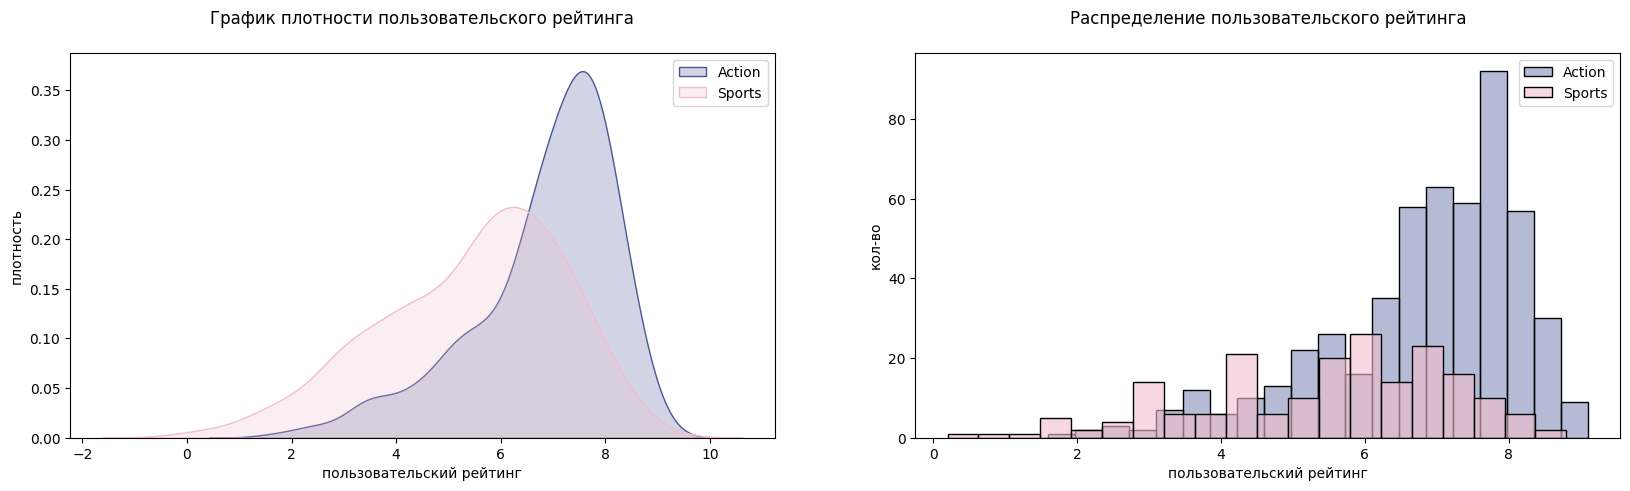

In [77]:
plt.figure(figsize=(20, 5))
ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(action_rating, 
            shade=True, color= palette[2], label='Action', ax=ax1)
sns.kdeplot(sports_rating, color= palette[1], shade=True, label='Sports', ax=ax1)
plt.title('График плотности пользовательского рейтинга\n ')
plt.ylabel('плотность')
plt.xlabel('пользовательский рейтинг')
plt.legend()
ax2 = plt.subplot(1, 2, 2)
sns.histplot(action_rating, bins=20, label='Action',
             color= palette[2], alpha=0.4, ax=ax2)
sns.histplot(sports_rating, bins=20, label='Sports',
             color= palette[1], alpha=0.6, ax=ax2)

plt.title('Распределение пользовательского рейтинга\n ')
plt.ylabel('кол-во')
plt.xlabel('пользовательский рейтинг')
plt.legend()
plt.show()

В данном случае для проверки гипотез также используем t-критерий Стьюдента, с указанием параметра equal_var = False

**Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные** 

`H_0`: средний пользовательский рейтинг жанра Action = средний пользовательский рейтинг жанра Sports

`H_1`: средний пользовательский рейтинг жанра Action ≠ средний пользовательский рейтинг жанра Sports

`alpha = 0.05`

In [78]:
results= st.ttest_ind(action_rating, sports_rating, equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print('p-значение:', results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.98945806646755e-20
Отвергаем нулевую гипотезу


**Вывод:** p_value почти равен 0, следовательно отвергаем нулевую гипотезу. Анализ  данных подтверждает наличие статистически значимых различий в среднем рейтинге между жанрами Action и Sports 

## Вывод
<a id="finish"></a>

В ходе исследования данных из открытых источников о продажах игр с 1980 по 2016 год удалось выявить:

-  производство и продажи игр с пиковых значений в 2008-2009-х снизились к 2012г больше чем 2 раза и в последние годы продолжает наблюдаться нисходящий тренд. Так, если в 2008 году было выпущено 1427 игр для разных платформ и продано 671.5 млн копий игр, то в 2015 г данные показатели упали до 606 игр и 268 млн. 
- снижение в последние годы наблюдается во всех регионах, хуже обстоят дела в Св. Америке
- платформа существует около 10 лет, но производители выпускают новую за 3-4 года до прекращения обслуживания предыдущей платформы 
- самые крупные производители платформ: Microsoft, Sony, Nintendo
- с 2012 года каждая выпустила на рынок по новой консоле - это XBox One, PS4 и WiiU соответственно 
- наибольшие продажи с 2012 года показала платформа PS4 - 314.1 млн копий игр, большая доля продаж пришлась на страны Европы(141.1)-лидер по платформам за период 2012-2016г и Америки(108.7)-2-е место. 
- за 2012-2016г больше всего выпускалось игр для жанра Action(35.7%), RPG(12,8%), Adventure(10.5%). По общему кол-ву продаж также лидирует жанр Action, 2-е место Shooter, 3-е игры жанра RPG. В Японии на первом месте RPG, а Shooter не входит в 5-ку
- пользователи больше доверяют мнению профессионалов, так между рейтингом критиков и продажами выявлена небольшая положительная корреляция, чего не скажешь про пользовательские рейтинги и продажи
- большая доля продаж приходится на игры с рейтингом М (от 17+), E (для всех возрастов) и игры без рейтинга 

Рекомендации:
- при создании рекламных компаний на 2017 год стоит ориентироваться на следующие платформы:  
для рынка Св.Америки и Европы - PS4 и XOne  
для рынка Японии - PS4 и WiiU
- стоит выбирать игры из популярных жанров:  
для стран Европы и Св.Америки - жанр Shooter, Sports   
для Японии - RPG для платформы WiiU. 
- игры жанра Action популярны во всех регионах, но среди них и самая большая конкуренция, для данных игр стоит учитывать рейтинги критиков
- лучше выбирать игры с рейтингом М и Е, но не стоит опасаться, если игра без рейтинга
